In [29]:
import importlib
import models
import helper_funtions
import preprocess
import settings

importlib.reload(settings)
importlib.reload(models)
importlib.reload(helper_funtions)
importlib.reload(preprocess)

import torch
import numpy as np
from models.LSTM import LSTM_HumanFi, CNN_LSTM, CNN_BiLSTM_TemporalAttention, CNN_BiLSTM_ChannelAttention, CNN_BiLSTM_DualAttention, CNN_BiLSTM_Attention
from models.RadioNet import RadioNet_NeuralWave
from models.ResNet import ECAResNet1D, ECABasicBlock1D, ResNet1D_JARILWWF, OptResNet1D_JARILWWF, OptECAResNet1D_JARILWWF, CustomResNet1D, CustomECAResNet1D
from models.TemporalConvNet import TemporalConvNet
from helper_funtions import evaluate_on_individual_file, evaluate_model, load_model_from_file, evaluate_on_multiple_files
from settings import DEVICE, CRITERION, folder_path_5ghz_10hz_collected, folder_path_5ghz_200hz_collected, folder_path_60ghz_collected, output_path, NUM_EPOCHS, ROWS_PER_SECOND, INPUT_DIM
from dataset import load_data

In [30]:
# temporalconvnet
# {'num_inputs': x, 'num_channels': [64, 128, 128], 'kernel_size': 2, 'dropout': 0.5}
# mixup

background_subtraction = True

model_paths = {
    "5ghz_10hz": "../output/trained_models/5ghz_10hz/5ghz_10hz_TemporalConvNet_32_adam_0.0007_52_[64, 128, 128]_2_0.5_363-500_0.4_0.0_42_1_5.pt", 
    "5ghz_200hz": "../output/trained_models/5ghz_200hz/5ghz_200hz_TemporalConvNet_32_adam_0.0007_52_[64, 128, 128]_2_0.5_249-500_0.4_0.0_42_1_5.pt",
    "60ghz": "../output/trained_models/60ghz_collected/60ghz_collected_TemporalConvNet_32_adam_0.0007_60_[64, 128, 128]_2_0.5_196-500_0.4_0.0_42_1_5.pt"
}
model_args = {
    "5ghz_10hz": {'num_inputs': 52, 'num_channels': [64, 128, 128], 'kernel_size': 2, 'dropout': 0.2, 'num_classes': 20}, 
    "5ghz_200hz": {'num_inputs': 52, 'num_channels': [64, 128, 128], 'kernel_size': 2, 'dropout': 0.2, 'num_classes': 18},
    "60ghz": {'num_inputs': 60, 'num_channels': [64, 128, 128], 'kernel_size': 2, 'dropout': 0.2, 'num_classes': 20}
}
model_class = TemporalConvNet

C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\src\helper_funtions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_saf

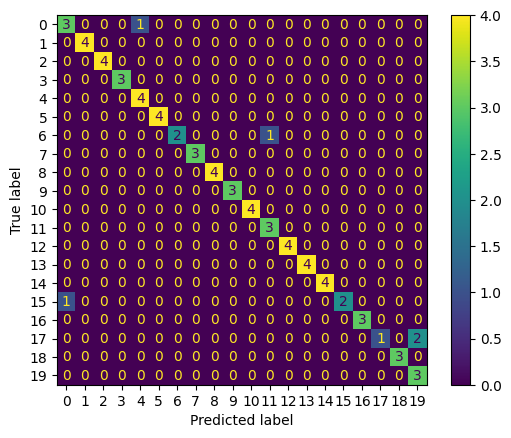

In [31]:
signal = "5ghz_10hz"
model = model_class(**model_args[signal])
load_model_from_file(model, model_paths[signal])
_, _, test_loader_normal = load_data(
    folder_path=folder_path_5ghz_10hz_collected,
    seconds_per_sample=5,
    rows_per_second=10,
    batch_size=32,
    val_split=0.15,
    test_split=0.15,
    background_subtraction=background_subtraction,
)
_, test_acc = evaluate_model(
    model=model,
    validation_loader=test_loader_normal,
    criterion=CRITERION,
    device=DEVICE,
    plot_confusion_matrix=True
)

C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\src\helper_funtions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_saf

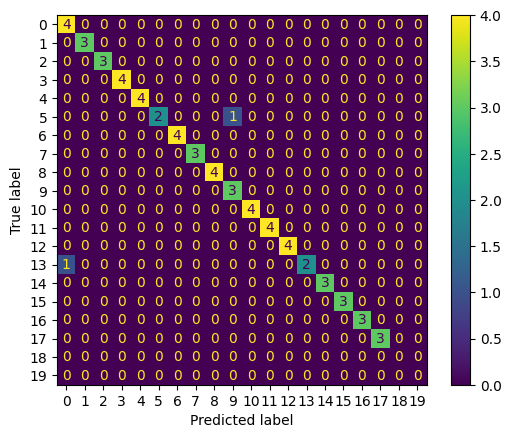

In [32]:
signal = "5ghz_200hz"
model = model_class(**model_args[signal])
load_model_from_file(model, model_paths[signal])
_, _, test_loader_normal = load_data(
    folder_path=folder_path_5ghz_200hz_collected,
    seconds_per_sample=5,
    rows_per_second=200,
    batch_size=32,
    val_split=0.15,
    test_split=0.15,
    background_subtraction=background_subtraction,
)
_, test_acc = evaluate_model(
    model=model,
    validation_loader=test_loader_normal,
    criterion=CRITERION,
    device=DEVICE,
    plot_confusion_matrix=True
)

C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\src\helper_funtions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_saf

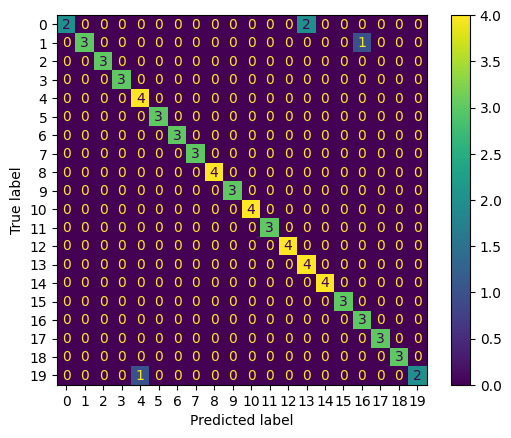

In [33]:
signal = "60ghz"
model = model_class(**model_args[signal])
load_model_from_file(model, model_paths[signal])
_, _, test_loader_normal = load_data(
    folder_path=folder_path_60ghz_collected,
    seconds_per_sample=5,
    rows_per_second=10,
    batch_size=32,
    val_split=0.15,
    test_split=0.15,
    background_subtraction=background_subtraction,
)
_, test_acc = evaluate_model(
    model=model,
    validation_loader=test_loader_normal,
    criterion=CRITERION,
    device=DEVICE,
    plot_confusion_matrix=True
)

After changing file

In [34]:
# signal = "5ghz_10hz"
# model = model_class(**model_args[signal])
# load_model_from_file(model, model_paths[signal])
# _, _, test_loader_cs = load_data(
#     folder_path=folder_path_5ghz_10hz_collected,
#     seconds_per_sample=5,
#     rows_per_second=10,
#     batch_size=32,
#     val_split=0.15,
#     test_split=0.15,
#     background_subtraction=background_subtraction,
# )
# _, test_acc = evaluate_model(
#     model=model_class,
#     validation_loader=test_loader_cs,
#     criterion=CRITERION,
#     device=DEVICE,
#     plot_confusion_matrix=True
# )

In [35]:
# signal = "5ghz_200hz"
# model = model_class(**model_args[signal])
# load_model_from_file(model, model_paths[signal])
# _, _, test_loader_cs = load_data(
#     folder_path=folder_path_5ghz_200hz_collected,
#     seconds_per_sample=5,
#     rows_per_second=200,
#     batch_size=32,
#     val_split=0.15,
#     test_split=0.15,
#     background_subtraction=background_subtraction,
# )
# _, test_acc = evaluate_model(
#     model=model_class,
#     validation_loader=test_loader_cs,
#     criterion=CRITERION,
#     device=DEVICE,
#     plot_confusion_matrix=True
# )

In [36]:
# signal = "60ghz"
# model = model_class(**model_args[signal])
# load_model_from_file(model, model_paths[signal])
# _, _, test_loader_cs = load_data(
#     folder_path=folder_path_60ghz_collected,
#     seconds_per_sample=5,
#     rows_per_second=10,
#     batch_size=32,
#     val_split=0.15,
#     test_split=0.15,
#     background_subtraction=background_subtraction,
# )
# _, test_acc = evaluate_model(
#     model=model_class,
#     validation_loader=test_loader_cs,
#     criterion=CRITERION,
#     device=DEVICE,
#     plot_confusion_matrix=True
# )

On individual files

In [37]:
# acc = evaluate_on_individual_file(
#     model_class=model_class,
#     model_args=model_args["5ghz_10hz"],
#     model_path=model_paths["5ghz_10hz"],
#     npy_file_path="../data/collected_csi_data_original_processed/5ghz/maksim_2025-03-13_5ghz.npy",
#     label_index=9,
#     device=DEVICE,
#     background_subtraction=background_subtraction
# )
# acc = evaluate_on_individual_file(
#     model_class=model_class,
#     model_args=model_args["5ghz_10hz"],
#     model_path=model_paths["5ghz_10hz"],
#     npy_file_path="../data/collected_csi_data_original_processed/5ghz/stein_2025-03-13_5ghz.npy",
#     label_index=16,
#     device=DEVICE,
#     background_subtraction=background_subtraction
# )

C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\src\helper_funtions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_saf

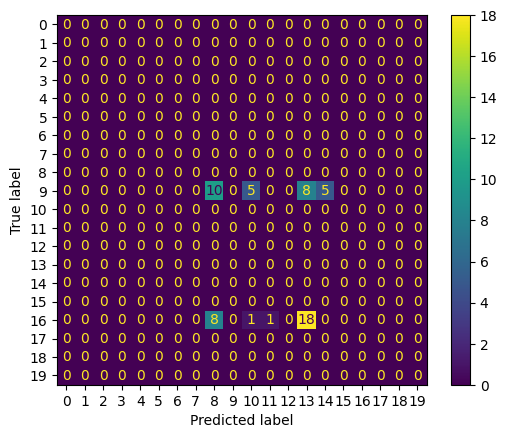

Combined accuracy over 2 files: 0.0000


In [38]:
acc = evaluate_on_multiple_files(
    model_class=model_class,
    model_args=model_args["5ghz_10hz"],
    model_path=model_paths["5ghz_10hz"],
    file_label_pairs=[
        ("../data/collected_csi_data_original_processed/5ghz/maksim_2025-03-13_5ghz.npy", 9),
        ("../data/collected_csi_data_original_processed/5ghz/stein_2025-03-13_5ghz.npy", 16)
    ],
    device=DEVICE,
    background_subtraction=background_subtraction
)


In [39]:
# acc = evaluate_on_individual_file(
#     model_class=model_class,
#     model_args=model_args["5ghz_200hz"],
#     model_path=model_paths["5ghz_200hz"],
#     npy_file_path="../data/collected_csi_data_original_processed/5ghz_200hz/maksim_2025-03-13_5ghz.npy",
#     label_index=9,
#     device=DEVICE,
#     background_subtraction=background_subtraction
# )
# acc = evaluate_on_individual_file(
#     model_class=model_class,
#     model_args=model_args["5ghz_200hz"],
#     model_path=model_paths["5ghz_200hz"],
#     npy_file_path="../data/collected_csi_data_original_processed/5ghz_200hz/stein_2025-03-13_5ghz.npy",
#     label_index=16,
#     device=DEVICE,
#     background_subtraction=background_subtraction
# )

C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\src\helper_funtions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_saf

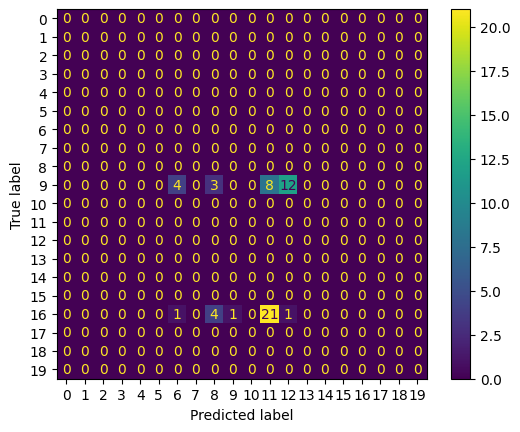

Combined accuracy over 2 files: 0.0000


In [40]:
acc = evaluate_on_multiple_files(
    model_class=model_class,
    model_args=model_args["5ghz_200hz"],
    model_path=model_paths["5ghz_200hz"],
    file_label_pairs=[
        ("../data/collected_csi_data_original_processed/5ghz_200hz/maksim_2025-03-13_5ghz.npy", 9),
        ("../data/collected_csi_data_original_processed/5ghz_200hz/stein_2025-03-13_5ghz.npy", 16)
    ],
    device=DEVICE,
    background_subtraction=background_subtraction,
    rows_per_second=200
)


In [41]:
# acc = evaluate_on_individual_file(
#     model_class=model_class,
#     model_args=model_args["60ghz"],
#     model_path=model_paths["60ghz"],
#     npy_file_path="../data/collected_csi_data_original_processed/60ghz/maksim_2025-03-13_60ghz.npy",
#     label_index=9,
#     device=DEVICE,
#     background_subtraction=background_subtraction
# )
# acc = evaluate_on_individual_file(
#     model_class=model_class,
#     model_args=model_args["60ghz"],
#     model_path=model_paths["60ghz"],
#     npy_file_path="../data/collected_csi_data_original_processed/60ghz/stein_2025-03-13_60ghz.npy",
#     label_index=16,
#     device=DEVICE,
#     background_subtraction=background_subtraction
# )

C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\.venv\Lib\site-packages\torch\nn\utils\weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
C:\Users\centu\PycharmProjects\MasterThesis_mmWavePI\src\helper_funtions.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_saf

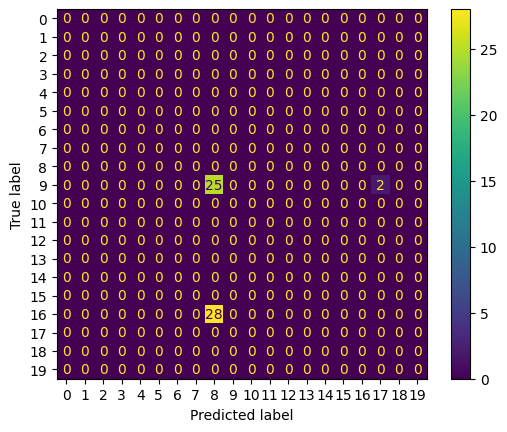

Combined accuracy over 2 files: 0.0000


In [42]:
acc = evaluate_on_multiple_files(
    model_class=model_class,
    model_args=model_args["60ghz"],
    model_path=model_paths["60ghz"],
    file_label_pairs=[
        ("../data/collected_csi_data_original_processed/60ghz/maksim_2025-03-13_60ghz.npy", 9),
        ("../data/collected_csi_data_original_processed/60ghz/stein_2025-03-13_60ghz.npy", 16)
    ],
    device=DEVICE,
    background_subtraction=background_subtraction
)
